In [2]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import os

# Create 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Download data for Apple (AAPL)
data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')

# Save to CSV inside the 'data' folder
data.to_csv('data/AAPL.csv')

# Display the first few rows
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.320435,24.789804,23.879983,24.778681,212818400
2015-01-05,23.635283,24.169162,23.448426,24.089080,257142000
2015-01-06,23.637512,23.897778,23.274918,23.699798,263188400
2015-01-07,23.968966,24.069067,23.735393,23.846617,160423600
2015-01-08,24.889904,24.947741,24.180289,24.298189,237458000


In [3]:
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data = data.dropna()


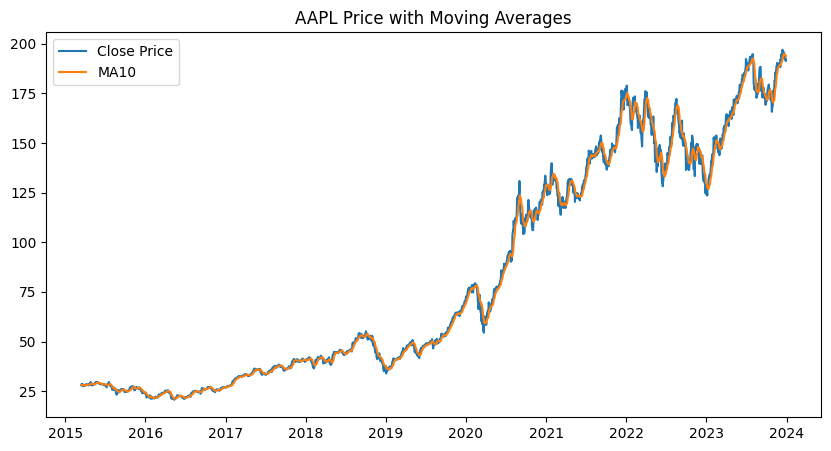

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA10'], label='MA10')
plt.legend()
plt.title("AAPL Price with Moving Averages")
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2v737szu/rmlz6unf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2v737szu/566zy3rz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24781', 'data', 'file=/tmp/tmp2v737szu/rmlz6unf.json', 'init=/tmp/tmp2v737szu/566zy3rz.json', 'output', 'file=/tmp/tmp2v737szu/prophet_modelf3ek3wqe/prophet_model-20250423155607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:56:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:56:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


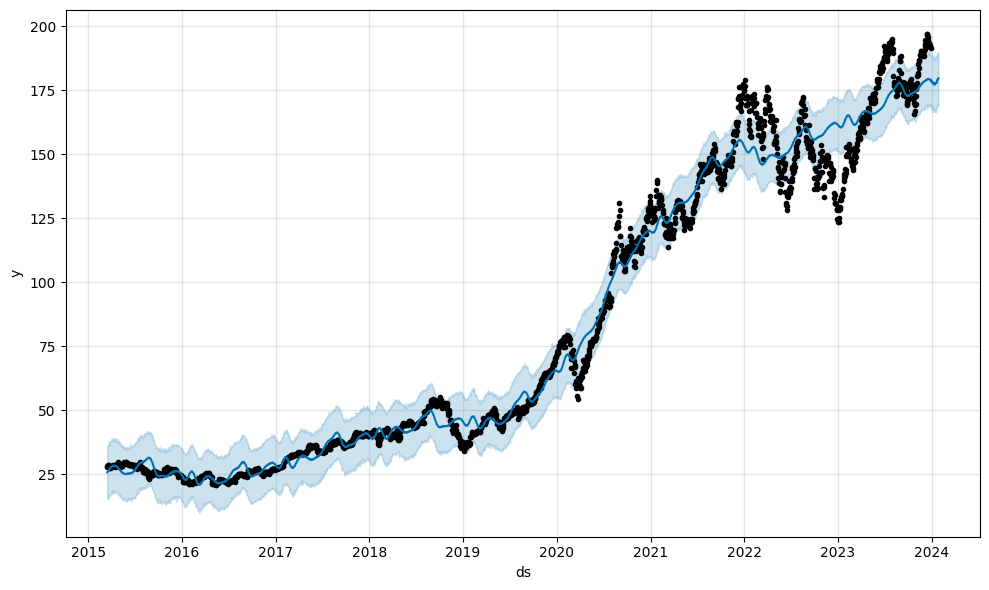

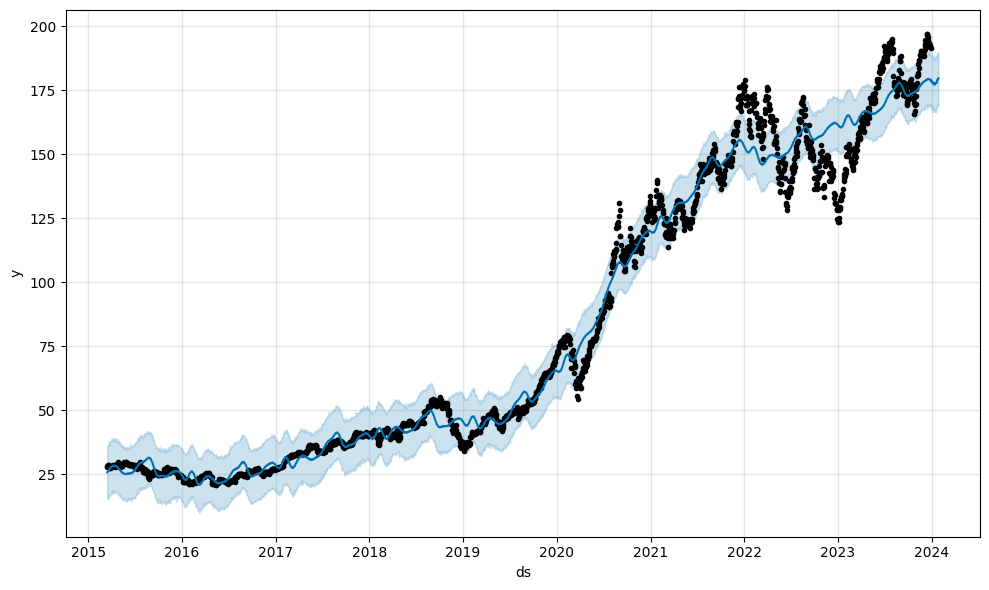

In [5]:
from prophet import Prophet

df = data.reset_index()[['Date', 'Close']]
df.columns = ['ds', 'y']

model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Download stock data
df = yf.download('AAPL', start='2015-01-01', end='2024-01-01')

# Use 'Close' price
df = df[['Close']].dropna()

# Shift the close price by 1 to use as prediction
df['Predicted_Close'] = df['Close'].shift(1)

# Drop first row (it will have NaN in prediction)
df = df.dropna()

# Define actual and predicted values
actual = df['Close']
predicted = df['Predicted_Close']

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", rmse)


[*********************100%***********************]  1 of 1 completed

RMSE: 1.7884544174601957
